**This notebook is an exercise in the [Data Visualization](https://www.kaggle.com/learn/data-visualization) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/line-charts).**

---


In this exercise, you will use your new knowledge to propose a solution to a real-world scenario. To succeed, you will need to import data into Python, answer questions using the data, and generate **line charts** to understand patterns in the data.

## Scenario

You have recently been hired to manage the museums in the City of Los Angeles. Your first project focuses on the four museums pictured in the images below.

![ex1_museums](https://storage.googleapis.com/kaggle-media/learn/images/pFYL8J1.png)

You will leverage data from the Los Angeles [Data Portal](https://data.lacity.org/) that tracks monthly visitors to each museum.  

![ex1_xlsx](https://storage.googleapis.com/kaggle-media/learn/images/mGWYlym.png)

## Setup

Run the next cell to import and configure the Python libraries that you need to complete the exercise.

In [3]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

## Step 1: Load the data

Your first assignment is to read the LA Museum Visitors data file into `museum_data`.  Note that:
- The filepath to the dataset is stored as `museum_filepath`.  Please **do not** change the provided value of the filepath.
- The name of the column to use as row labels is `"Date"`.  (This can be seen in cell A1 when the file is opened in Excel.)

To help with this, you may find it useful to revisit some relevant code from the tutorial, which we have pasted below:

```python
# Path of the file to read
spotify_filepath = "../input/spotify.csv"

# Read the file into a variable spotify_data
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
```

The code you need to write now looks very similar!

In [8]:
# Path of the file to read
museum_filepath = "../input/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col = "Date", parse_dates=True)

# Run the line below with no changes to check that you've loaded the data correctly
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [9]:
# Path of the file to read
museum_filepath = "../input/museum_visitors.csv"

# Fill in the line below to read the file into a variable museum_data
museum_data = pd.read_csv(museum_filepath, index_col = "Date", parse_dates=True)
museum_data.head()

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


In [10]:
# Uncomment the line below to receive a hint
step_1.hint()
# Uncomment the line below to see the solution
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `pd.read_csv`, and follow it with **three** pieces of text that are enclosed in parentheses and separated by commas.  (1) The filepath for the dataset is provided in `museum_filepath`.  (2) Use the `"Date"` column to label the rows. (3) Make sure that the row labels are recognized as dates.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
museum_data = pd.read_csv(museum_filepath, index_col="Date", parse_dates=True)
```

## Step 2: Review the data

Use a Python command to print the last 5 rows of the data.

In [11]:
# Print the last five rows of the data 
____ # Your code here
museum_data.tail(5)

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2018-07-01,23136,4191,2620,4718
2018-08-01,20815,4866,2409,3891
2018-09-01,21020,4956,2146,3180
2018-10-01,19280,4622,2364,3775
2018-11-01,17163,4082,2385,4562


The last row (for `2018-11-01`) tracks the number of visitors to each museum in November 2018, the next-to-last row (for `2018-10-01`) tracks the number of visitors to each museum in October 2018, _and so on_.

Use the last 5 rows of the data to answer the questions below.

In [17]:
# Fill in the line below: How many visitors did the Chinese American Museum 
# receive in July 2018?
ca_museum_jul18 = museum_data["Chinese American Museum"]["2018-07"].sum()

# Fill in the line below: In October 2018, how many more visitors did Avila 
# Adobe receive than the Firehouse Museum?
avila_oct18 = museum_data["Avila Adobe"]["2018-10"].sum() - museum_data["Firehouse Museum"]["2018-10"].sum() 

# Check your answers
step_2.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [18]:
# Lines below will give you a hint or solution code
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use the `tail()` command that you learned about in the tutorial to print the last five rows. **After printing the last five rows**, the number of visitors in July 2018 for each museum can be found in the row marked `2018-07-01`, and the number of visitors in October 2018 for each museum can be found in the row marked `2018-10-01`.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Print the last five rows of the data
museum_data.tail()
# How many visitors did the Chinese American Museum 
# receive in July 2018? 
ca_museum_jul18 = 2620
# In October 2018, how many more visitors did Avila 
# Adobe receive than the Firehouse Museum?
avila_oct18 = 14658

```

## Step 3: Convince the museum board 

The Firehouse Museum claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again.  The other museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.  

To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time.  Your figure should have four lines (one for each museum).

> **(Optional) Note**: If you have some prior experience with plotting figures in Python, you might be familiar with the `plt.show()` command.  If you decide to use this command, please place it **after** the line of code that checks your answer (in this case, place it after `step_3.check()` below) -- otherwise, the checking code will return an error!

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

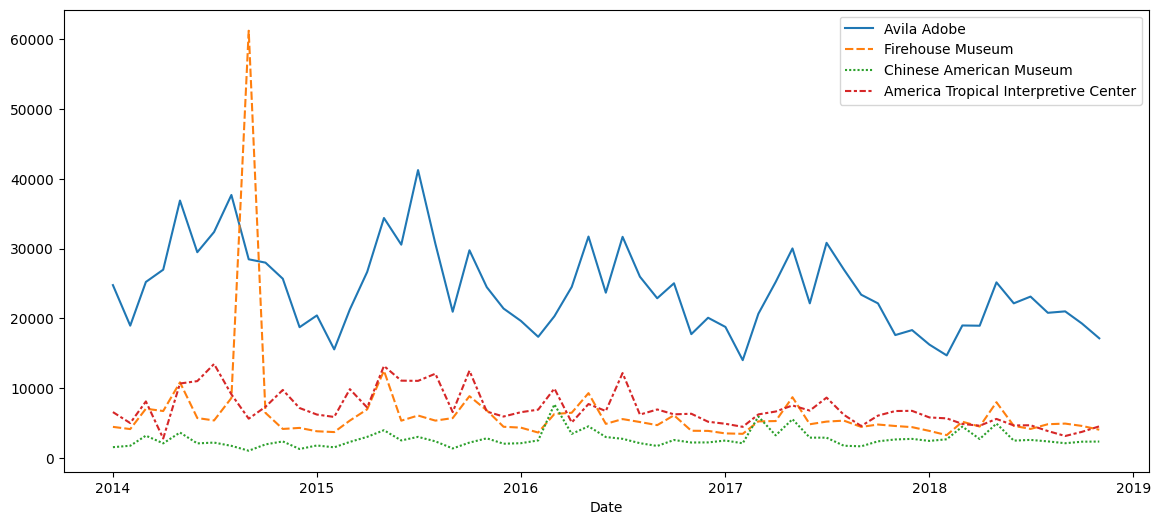

In [19]:
# Line chart showing the number of visitors to each museum over time
____ # Your code here
plt.figure(figsize=(14,6))
sns.lineplot(data=museum_data)
# Check your answer
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.lineplot`, and plot one line for each museum in `museum_data`. (_You can do this in a single line of code!_)

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Set the width and height of the figure
plt.figure(figsize=(12,6))
# Line chart showing the number of visitors to each museum over time
sns.lineplot(data=museum_data)
# Add title
plt.title("Monthly Visitors to Los Angeles City Museums")

```

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


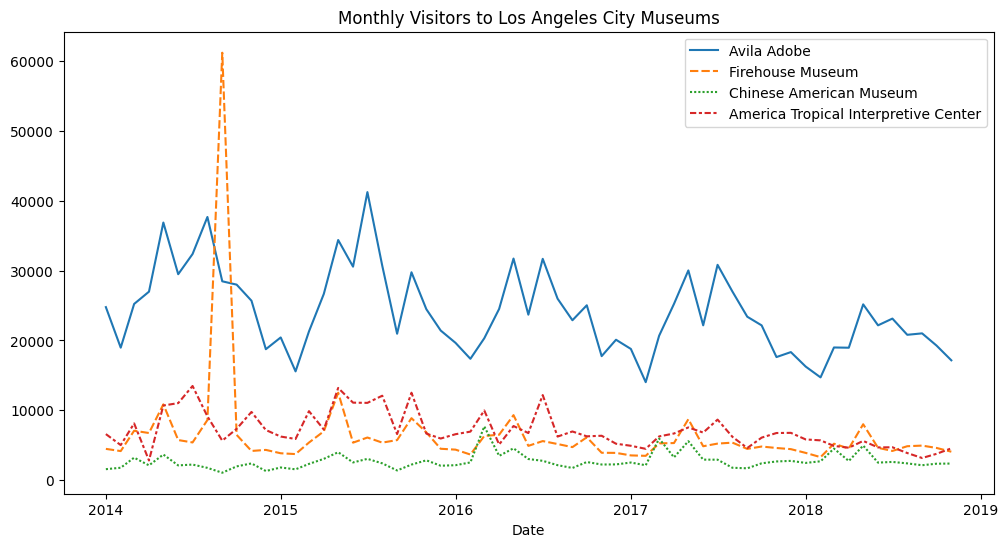

In [20]:
# Lines below will give you a hint or solution code
step_3.hint()
step_3.solution_plot()

## Step 4: Assess seasonality

When meeting with the employees at Avila Adobe, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed).  You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

#### Part A
Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time.  (_If your code returns an error, the first thing that you should check is that you've spelled the name of the column correctly!  You must write the name of the column exactly as it appears in the dataset._)

Thank you for creating a line chart!  To see how your code compares to the official solution, please use the code cell below.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

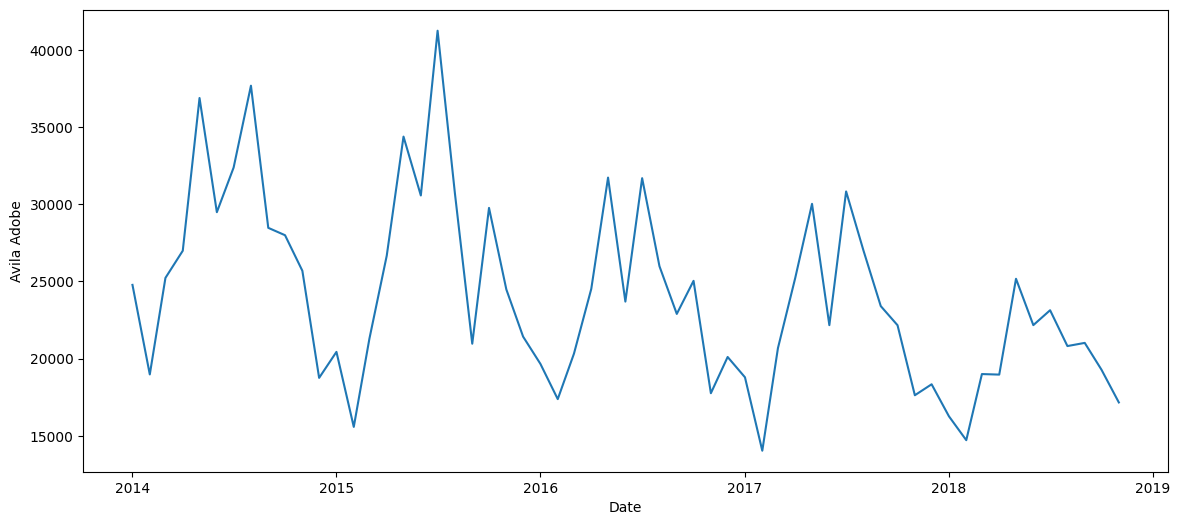

In [21]:
# Line plot showing the number of visitors to Avila Adobe over time
____ # Your code here
plt.figure(figsize=(14,6))
sns.lineplot(data=museum_data["Avila Adobe"])
# Check your answer
step_4.a.check()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Use `sns.lineplot` to plot the `'Avila Adobe'` column in `museum_data`. (_If you like, use `label=` to add the line to the legend, but this is not necessary!_)

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
# Set the width and height of the figure
plt.figure(figsize=(12,6))
# Add title
plt.title("Monthly Visitors to Avila Adobe")
# Line chart showing the number of visitors to Avila Adobe over time
sns.lineplot(data=museum_data['Avila Adobe'])
# Add label for horizontal axis
plt.xlabel("Date")

```

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


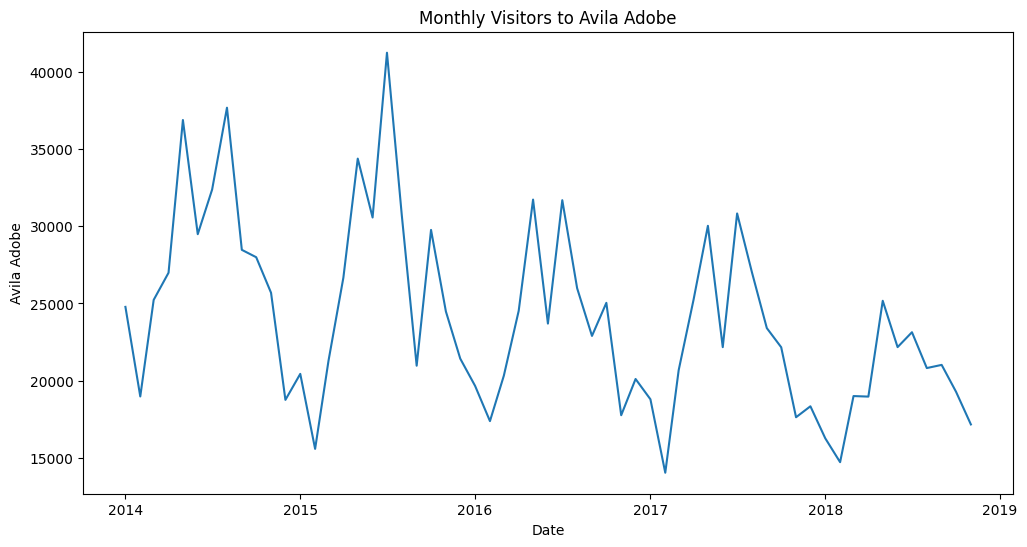

In [22]:
# Lines below will give you a hint or solution code
step_4.a.hint()
step_4.a.solution_plot()

#### Part B

Does Avila Adobe get more visitors:
- in September-February (in LA, the fall and winter months), or 
- in March-August (in LA, the spring and summer)?  

Using this information, when should the museum staff additional seasonal employees?

In [29]:
#step_4.b.hint()
monthly_visitors = museum_data.groupby([museum_data.index.month])['Avila Adobe'].sum()
print(monthly_visitors)

Date
1      99932
2      80685
3     106531
4     122380
5     158196
6     128092
7     159276
8     142191
9     116760
10    124243
11    102726
12     78626
Name: Avila Adobe, dtype: int64


In [25]:
# Check your answer (Run this code cell to receive credit!)
step_4.b.solution()

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> The line chart generally dips to relatively low values around the early part of each year (in December and January), and reaches its highest values in the middle of the year (especially around May and June).  Thus, Avila Adobe usually gets more visitors in March-August (or the spring and summer months).  With this in mind, Avila Adobe could definitely benefit from hiring more seasonal employees to help with the extra work in March-August (the spring and summer)!

# Keep going

Move on to learn about **[bar charts and heatmaps](https://www.kaggle.com/alexisbcook/bar-charts-and-heatmaps)** with a new dataset!

---




*Have questions or comments? Visit the [course discussion forum](https://www.kaggle.com/learn/data-visualization/discussion) to chat with other learners.*